<a href="https://colab.research.google.com/github/lerrlera/IAT360-CV-Project-Group14/blob/myBranch/CV_Sign_For_Help.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Problem: Sign For Help
###Group 14
Our computer vision project aims to develop a model capable of detecting and recognizing the [Signal for Help (SFH)](https://canadianwomen.org/signal-for-help/) hand gesture–a universal distress signal used by individuals experiencing violence or abuse. The problem we are addressing is the lack of accessible and automated tools that can identify this silent call for help, which could support early intervention and improve personal safety.

This is an important issue because many victims cannot ask for help out loud (e.g., the abuser is nearby), and this automatic gesture recognition could enable faster responses and potentially save lives. Our model could be used in real life to detect SFH through smartphone cameras, wearable devices, telehealth sessions, or public service kiosks, enabling faster intervention and support for individuals experiencing abuse.


## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

## Dataset Description
For this project, we need image data resembling two specific hand gestures as a picture below:

*   An open hand with tucked thumb
*   A closed hand with a trapped thumb



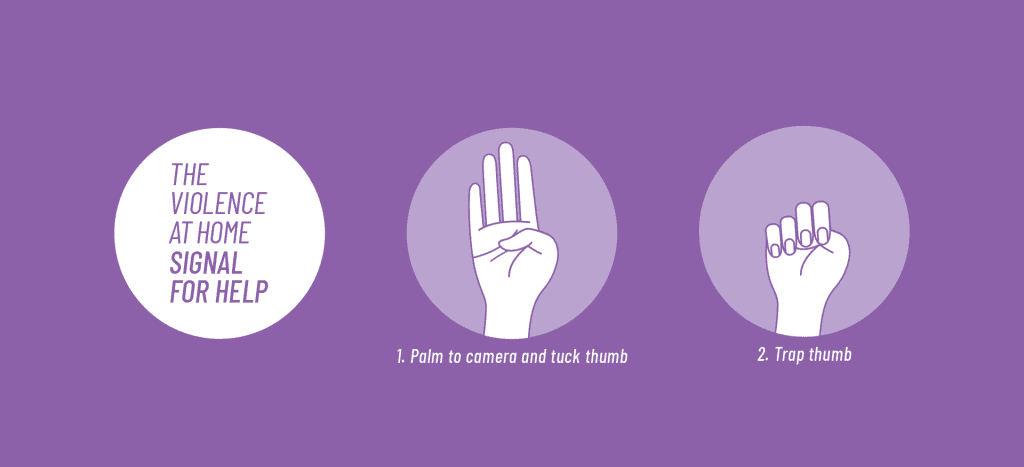

**Source:** Signal for help | Use Signal to ask for help.  (n.d.). Canadian Women’s Foundation. https://canadianwomen.org/signal-for-help/

###Details

These images were sourced from 2 existing datasets and organized into 2 class folders, ‘open_hand’ and ‘closed_hand’ for a classification task. Specifically, we used images labelled ‘B’ from the ASL dataset from the ASL dataset for our ‘open_hand’ class, and images labelled ‘A’ and ‘S’ for our ‘closed_hand’ class. We also supplemented our data with additional images from the Hands Images dataset, which better capture the specific thumb positions we needed and include hands wearing gloves.

We have 2 labels, ‘open_hand’ and ‘closed_hand’. Since this is a supervised classification task, the folder structure itself serves as a label; images in the ‘open_hand’ folder belong to ‘open_hand’ class, and the same labelling rule applies for those in the ‘closed_hand’ folder.

###Adding More Data
We also added 30 (15 for each class) new images each sourced from...


###Data Split

Total number of images in each class was: 3,037. 2/3 of this data should was used as training data, the rest is for evaluation:

**‘open_hand’**
*   2,025 images in train folder
*   1,012 images in test folder

**‘closed_hand’**
*   2,025 images in train folder
*   1,012 images in test folder


Here is a Google Drive link to the zipped datasets used in this project:



*   [SFH Dataset](https://drive.google.com/drive/folders/1puxrFn5ijZAyBCCPxtzP0QTTBX_QTSmd?usp=sharing)


Here are existing datasets we used to collect this data:

*   [ASL Alphabet Dataset on Kaggle](https://www.kaggle.com/datasets/grassknoted/asl-alphabet)
*   [Hands Images Dataset on Hugging Face](https://huggingface.co/datasets/trashsock/hands-images)

## Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
  - Labels format should be darknet YOLO.
  - Labels files should be .txt files


### Heirarchy of Folders Correction

Defining paths to train and test folders.

In [ ]:
test_dir = '/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/test_zip/test'
train_dir = '/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/train_zip/train'